In [62]:
import pandas as pd
import os
import numpy as np
import umap.umap_ as umap
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from matplotlib.lines import Line2D
import random
%matplotlib inline

In [39]:
with open('/project/gpaa/machine_learning/jainam_capstone/preprocessing/AA_labeled_batches0-16.csv', 'r') as f:
  df_labeled_init_no_liver = pd.read_csv(f)

df_labeled_init_no_liver = df_labeled_init_no_liver.rename(columns={'sample_id': "Run"})

target = df_labeled_init_no_liver['binary_pathology']
data = df_labeled_init_no_liver.drop(['Run', 'AGE', 'white', 'black', 'hispanic', 'male', 'female', 'binary_pathology'], axis=1)

In [57]:
with open('/project/gpaa/machine_learning/jainam_capstone/preprocessing/GPAA_AA_batches0-16_metadata.csv', 'r') as f:
    metadata = pd.read_csv(f)
merged = df_labeled_init_no_liver.merge(metadata, how='inner', right_on = "UVA_sample_id", left_on = "Run").drop(['UVA_sample_id'], axis=1)

In [58]:
path_score = merged["% Involvement FC = FP+CO/CA"]

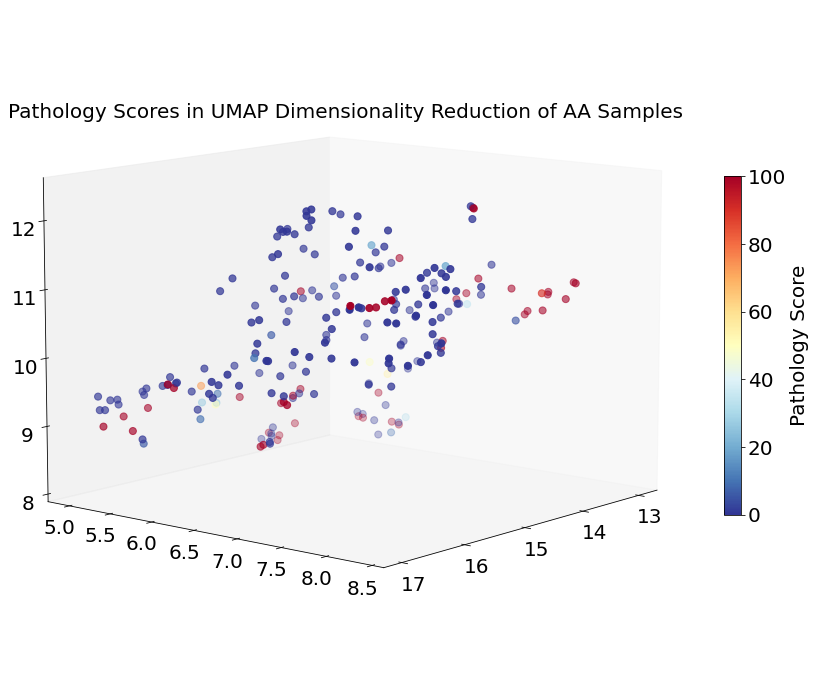

In [114]:
random.seed(42)
fit = umap.UMAP(n_components=3, random_state=42)
u = fit.fit_transform(data);
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection = "3d")
colors = plt.cm.get_cmap('RdYlBu_r')
scatter = ax.scatter(u[:,0], u[:,1], u[:,2], c = path_score, cmap = colors, s=50)
ax.set_title('Pathology Scores in UMAP Dimensionality Reduction of AA Samples', fontsize=20, y = 0.9)
cbar = plt.colorbar(scatter, fraction=0.046, pad=0.04, shrink = 0.5)
cbar.set_label('Pathology Score')
plt.rcParams.update({'font.size': 20})
ax.grid(False)
ax.xaxis.set_ticks(np.arange(13, 18, 1))
ax.view_init(10, 40)

In [118]:
with open("/project/gpaa/machine_learning/jainam_capstone/confusion_matrix_new/holdout_DE_XGB_confusion_AA.csv") as f:
    XGB = pd.read_csv(f)
XGB.drop("Unnamed: 0", axis = 1, inplace= True)

In [125]:
DE90 = XGB[XGB["model_id"] == "DE_90"]

In [126]:
merged = df_labeled_init_no_liver.merge(DE90, how='inner', right_on = "sample_id", left_on = "Run").drop(['sample_id'], axis=1)

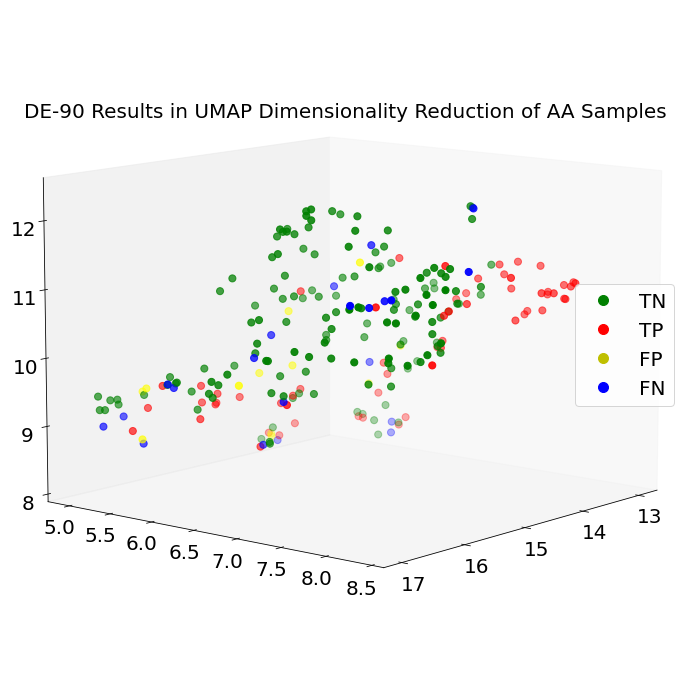

In [128]:
random.seed(42)
fit = umap.UMAP(n_components=3, random_state=42)
u = fit.fit_transform(data);
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection = "3d")
colors = {'TN':'green', 'TP':'red', 'FP':'yellow', 'FN':'blue'}
scatter = ax.scatter(u[:,0], u[:,1], u[:,2], c = merged["confusion_mat"].map(colors), s=50)
ax.set_title('DE-90 Results in UMAP Dimensionality Reduction of AA Samples', fontsize=20, y = 0.9)
plt.rcParams.update({'font.size': 20})
legend_elements = [Line2D([0], [0], marker='o', color='g', label='TN',
                          markerfacecolor='g', markersize=10, linestyle = "None"),
                  Line2D([0], [0], marker='o', color='r', label='TP',
                          markerfacecolor='r', markersize=10, linestyle = "None"),
                  Line2D([0], [0], marker='o', color='y', label='FP',
                          markerfacecolor='y', markersize=10, linestyle = "None"),
                  Line2D([0], [0], marker='o', color='b', label='FN',
                          markerfacecolor='b', markersize=10, linestyle = "None")]
ax.legend(handles = legend_elements, loc = "right")
ax.grid(False)
ax.xaxis.set_ticks(np.arange(13, 18, 1))
ax.view_init(10, 40)